# SDC Project 3: Build a Traffic Sign Recognition Classifier

### By Devin Datt     Due: August 31st, 2018


### Objective
Design and implement a deep learning model that learns to recognize traffic signs. I will  train and test my model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

---
## Step 0: Load The Data

In [1]:
#Import all necessary packages, some will be loaded further in the notebook
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle   # Load pickled data
import tensorflow as tf

#Reading training and testing data from a pickle file
training_file = '/home/workspace/data/train.p'
validation_file= '/home/workspace/data/valid.p'
testing_file = '/home/workspace/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


ttl_samples = len(X_train) + len(X_valid) + len(X_test)


# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Number of validation examples
n_validation = len(X_valid)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(test['labels']))
#n_classes = len((test['labels']))


print("Total number of examples to use =", ttl_samples)


print("Number of training examples = {} ({}%)".format(n_train, int(n_train/ttl_samples*100)))
print("Number of testing examples = {} ({}%)".format(n_test, int(n_test/ttl_samples*100)))
print("Number of validation examples ={} ({}%)".format(n_validation, int(n_validation/ttl_samples*100)))
print("Image data shapes =", image_shape)
print("Number of classes =", n_classes)

Total number of examples to use = 51839
Number of training examples = 34799 (67%)
Number of testing examples = 12630 (24%)
Number of validation examples =4410 (8%)
Image data shapes = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Print out the categories of the traffic signs
y = np.bincount(y_train)
labels_pd = pd.read_csv('./signnames.csv', sep=',')
labels_pd

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [5]:
# Nearly 20% (8 categories) have more then 1500 traffic signs in them
y[y >1500]

array([1980, 2010, 1770, 1650, 1800, 1890, 1920, 1860])

In [6]:
# Nearly 50% (21 categories) have less then 500 traffic signs in them
y[y <500]

array([180, 360, 360, 180, 300, 270, 330, 450, 240, 210, 480, 240, 390,
       210, 360, 330, 180, 270, 300, 210, 210])

In [7]:
# Print the top 10 most frequent signs
from collections import Counter
x = Counter(y_train)
y = sorted(x.items(), key = lambda x: x[1], reverse=True)

for i in y[:10]:
    print('Sign : ',labels_pd['SignName'].loc[labels_pd['ClassId'] == i[0]])
    print('Appears : ',i[1], ' times.')
    print(  )

Sign :  2    Speed limit (50km/h)
Name: SignName, dtype: object
Appears :  2010  times.

Sign :  1    Speed limit (30km/h)
Name: SignName, dtype: object
Appears :  1980  times.

Sign :  13    Yield
Name: SignName, dtype: object
Appears :  1920  times.

Sign :  12    Priority road
Name: SignName, dtype: object
Appears :  1890  times.

Sign :  38    Keep right
Name: SignName, dtype: object
Appears :  1860  times.

Sign :  10    No passing for vehicles over 3.5 metric tons
Name: SignName, dtype: object
Appears :  1800  times.

Sign :  4    Speed limit (70km/h)
Name: SignName, dtype: object
Appears :  1770  times.

Sign :  5    Speed limit (80km/h)
Name: SignName, dtype: object
Appears :  1650  times.

Sign :  25    Road work
Name: SignName, dtype: object
Appears :  1350  times.

Sign :  9    No passing
Name: SignName, dtype: object
Appears :  1320  times.



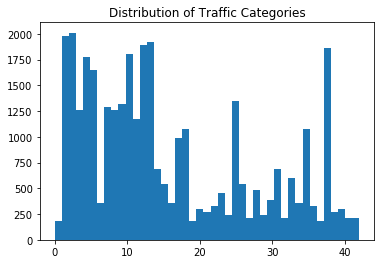

In [8]:
plt.hist(y_train, bins=43);
plt.title('Distribution of Traffic Categories');

Video Hint: look at how many images of each in each class? Turns out some more then others and this can affect the accuracy of your model and its performance.

Video Hint: print out some of the images in each class, to see if you need to do any preprocessing of the images, clearing up, rotation... try normalizing all images (-127.5/255)

----

## Step 2: Design and Test a Model Architecture

Some of the aspects we considered when implementing the LeNet model for the purposes of builing a Traffic Sign classification were:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Try converting to Grayscale since these are colour images
#Extra - Histogram normalization which will clarify some of the darker images 

This sign is:  1    Speed limit (30km/h)
Name: SignName, dtype: object


(32, 32, 3)

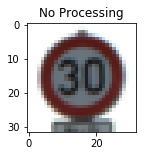

In [144]:
import cv2

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

#print(y_train[index])
print('This sign is: ',labels_pd['SignName'].loc[labels_pd['ClassId'] == y_train[index]])
plt.figure(figsize=(2,2))
plt.imshow(image);
plt.title('No Processing');
image.shape
#X_train

In [11]:
# Convert the image to grayscale

def grayscaler(img):
    
#    img = img[]
    
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

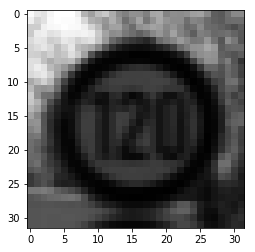

(32, 32)


In [12]:
gray_image = grayscaler(image)
#print(gray_image)
plt.imshow(gray_image,cmap='gray')
plt.show()
print(gray_image.shape)

In [13]:
# Define a normalize function for images

def normalize(x):
    
    return (x - 128) / 128
#    return (x - 127.5) /255

In [145]:
def color_thresh(img, s_thresh=(0, 255), v_thresh=(0, 255)):
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) #convert to HLS space
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) #or HSV space
    h2_channel = hsv[:,:,0]
    s2_channel = hsv[:,:,1]
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
   
    col_binary = np.zeros_like(s_channel)
    col_binary[(s_binary == 1) & (v_binary == 1)] = 1

    
#    plt.imshow(h_channel)
#    plt.imshow(l_channel)
    plt.imshow(s_channel)
#    plt.imshow(s_binary)
#    print('....')

#    plt.imshow(h2_channel)
#    plt.imshow(s2_channel)  #not bad
#    plt.imshow(v_channel)   #better
#    plt.imshow(v_binary)
#    print('....')

    plt.figure(figsize=(2,2))
    plt.imshow(s_channel, cmap = 'gray');
    plt.title('With Color Thresh');
    print(s_channel.shape)
#    return col_binary

(32, 32)


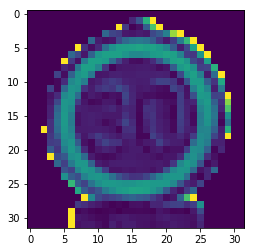

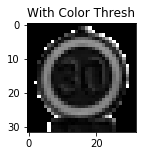

In [146]:
color_thresh(image, s_thresh=(1, 110), v_thresh=(80, 230))

(32, 32)

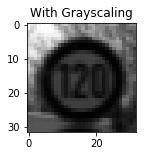

In [16]:
image = grayscaler(image)
plt.figure(figsize=(2,2))
plt.imshow(image, cmap = 'gray');
plt.title('With Grayscaling');
image.shape

This sign is:  8    Speed limit (120km/h)
Name: SignName, dtype: object


(32, 32)

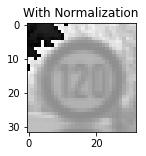

In [17]:
#X_train2 = (X_train -128)/128
#index2 = index
#image2 = X_train2[index].squeeze()

image = normalize(image)
print('This sign is: ',labels_pd['SignName'].loc[labels_pd['ClassId'] == y_train[index]])
plt.figure(figsize=(2,2))
plt.title('With Normalization');
plt.imshow(image, cmap = 'gray');
image.shape
#X_train2

In [18]:
# Shuffle the training data

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

#Attempt to reduce the color channels from 3 to 1, but shape was not coming out as (32,32)

def rgb2gray(rgb):
    r, g, b = rgb[0], rgb[1], rgb[2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

X_train_gray = X_train.copy()

for i in range (X_train_gray.shape[0]):
    for j in range (X_train_gray.shape[1]):
        for k in range (X_train_gray.shape[2]):
            rgb = X_train_gray[i,j,k]
            gray = rgb2gray(rgb)
            X_train_gray[i,j,k] = gray

print("X_train image data shape =", X_train.shape)
print("X_train_grey image data shape =", X_train_gray.shape)

In [141]:
X_train_greyscale = np.sum(X_train/3, axis=3, keepdims=True)

This sign is:  26    Traffic signals
Name: SignName, dtype: object


(32, 32)

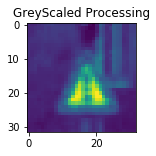

In [143]:
index = random.randint(0, len(X_train_greyscale))
image = X_train_greyscale[index].squeeze()
#image = X_train_greyscale[index]


print('This sign is: ',labels_pd['SignName'].loc[labels_pd['ClassId'] == y_train[index]])
plt.figure(figsize=(2,2))
plt.imshow(image);
plt.title('GreyScaled Processing');
image.shape

In [21]:
#X_train = np.array([normalize(img) for img in X_train])
#X_valid = np.array([normalize(img) for img in X_valid])
#X_test = np.array([normalize(img) for img in X_test])

This sign is:  10    No passing for vehicles over 3.5 metric tons
Name: SignName, dtype: object


(32, 32, 3)

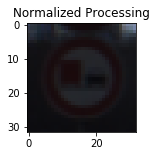

In [22]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

print('This sign is: ',labels_pd['SignName'].loc[labels_pd['ClassId'] == y_train[index]])
plt.figure(figsize=(2,2))
plt.imshow(image);
plt.title('Normalized Processing');
image.shape

### Setup TensorFlow

### Model Architecture

In [23]:
# Here as the project lessons suggest, I used the LeNet CNN as my starting
# point of my architecture. 

I was going to use colour image threshold manipulation on my traffic images but I seem to lose the 3rd dimension whenever I do a transition from colour to either grayscale, sobel, or binary. This loss of the 3rd channel results in .shape of (32,32) instead of (32,32,1). This shape (ie. 32,32) would produce errors when I tried to declare a placeholder variable. As a result, this limited me to only using colour (3-channel) 32x32 images as my input for my CNN. As you will see with all my experimentation below I can't get over 95.5% accuracy when only using colour images. If I figure out how to preserve the 3rd 

In [131]:
EPOCHS = 50
BATCH_SIZE = 300
rate = 0.001

In [132]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

#    x = grayscaler(x)
    x = normalize(x)
    
#    x = color_thresh(x, s_thresh=(1, 110), v_thresh=(80, 230))
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
#    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(tf.nn.relu(conv1), keep_prob)


    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
#    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    ksize=[1, 2, 2, 1]
    strides=[1, 2, 2, 1]
    padding='VALID'
    conv1 = tf.nn.dropout(tf.nn.max_pool(conv1, ksize, strides, padding), keep_prob)

    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    
    
    # SOLUTION: Activation.
#    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(tf.nn.relu(conv2), keep_prob)


    
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
#    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    ksize=[1, 2, 2, 1]
    strides=[1, 2, 2, 1]
    padding='VALID'
    conv2 = tf.nn.dropout(tf.nn.max_pool(conv2, ksize, strides, padding), keep_prob)


    
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
#    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(tf.nn.relu(fc1), keep_prob)


    
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    # SOLUTION: Layer 4: Fully Connected. Input = 256. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
#    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(tf.nn.relu(fc2), keep_prob)

    
    

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    # SOLUTION: Layer 5: Fully Connected. Input = 100. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [133]:
# Define placeholder for batch input (x) and output (y)
# Define the final 43 one hot encodings we need to our probabilities to fall into at the end

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [134]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [135]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [136]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model

Here we run the training data through the training pipeline created above to train the model.

Before each epoch, we shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [137]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    acc_stats = {}
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.9})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        acc_stats[i] = (validation_accuracy)
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.660

EPOCH 2 ...
Validation Accuracy = 0.824

EPOCH 3 ...
Validation Accuracy = 0.864

EPOCH 4 ...
Validation Accuracy = 0.905

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.921

EPOCH 7 ...
Validation Accuracy = 0.916

EPOCH 8 ...
Validation Accuracy = 0.922

EPOCH 9 ...
Validation Accuracy = 0.937

EPOCH 10 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.932

EPOCH 12 ...
Validation Accuracy = 0.936

EPOCH 13 ...
Validation Accuracy = 0.937

EPOCH 14 ...
Validation Accuracy = 0.938

EPOCH 15 ...
Validation Accuracy = 0.942

EPOCH 16 ...
Validation Accuracy = 0.944

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.936

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.946

EPOCH 21 ...
Validation Accuracy = 0.946

EPOCH 22 ...
Validation Accuracy = 0.940

EPOCH 23 ...
Validation Accuracy = 0.944

EPOCH 24 ...
Validation Accura

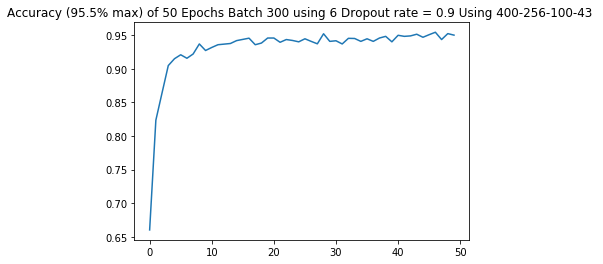

In [138]:
lists = sorted(acc_stats.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x,y);
plt.title('Accuracy (95.5% max) of 50 Epochs Batch 300 using 6 Dropout rate = 0.9 Using 400-256-100-43 ');

Accuracy 95.5% max of 50 Epochs, Batch 300, Learning Rate = 0.001 using 6 Dropout rate=0.9, Using 400-256-100-43 connection matrix
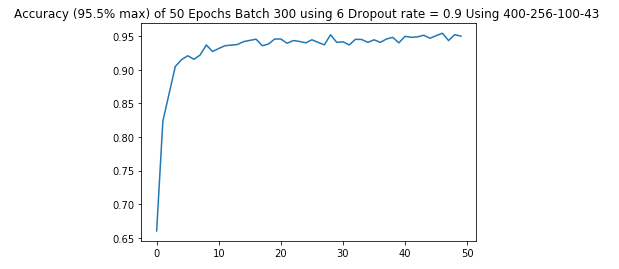

Accuracy ~93% max of 30 Epochs, Batch 128, Learning Rate = 0.0005 using 6 Dropout rate=0.7, Using 400-256-100-43 connection matrix
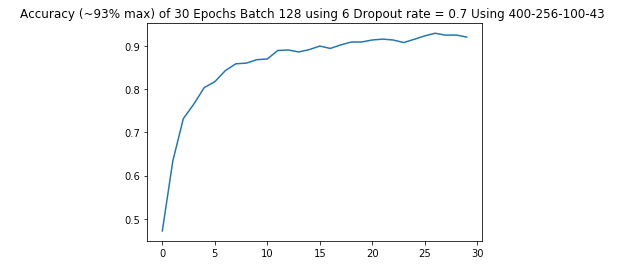

Accuracy 71% max of 30 Epochs, Batch 128, Learning Rate = 0.0005 using 6 Dropout rate=0.5, Using 400-256-100-43 connection matrix
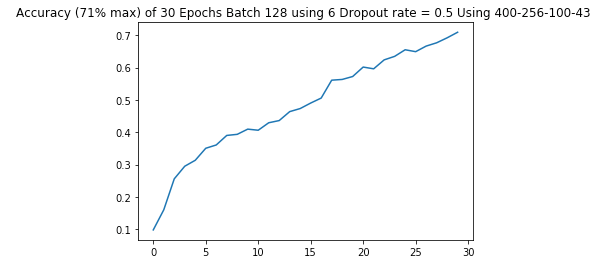

Accuracy ~96% max of 30 Epochs, Batch 128, Learning Rate = 0.0005 using 6 Dropout rate=0.9, Using 400-256-100-43 connection matrix
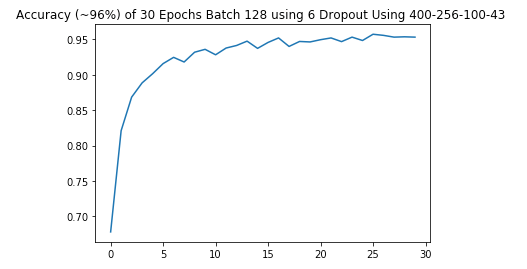

Accuracy 95% max of 50 Epochs, Batch 64, Learning Rate = 0.001 using 6 Dropout rate=0.9, Using 400-256-100-43 connection matrix
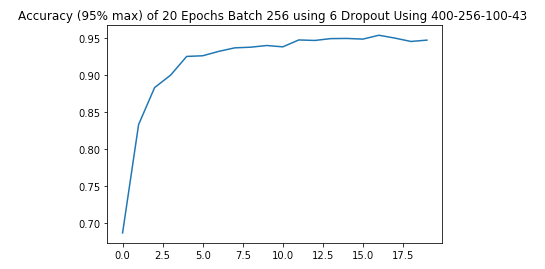

Accuracy 95% max of 50 Epochs, Batch 64, Learning Rate = 0.001 using 6 Dropout rate=0.9, Using 400-256-100-43 connection matrix
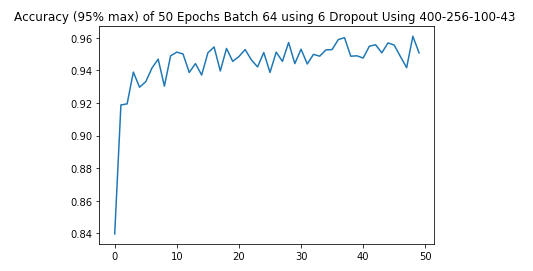

Accuracy 95% max of 50 Epochs, Batch 64, Learning Rate = 0.001 using 6 Dropout rate=0.9
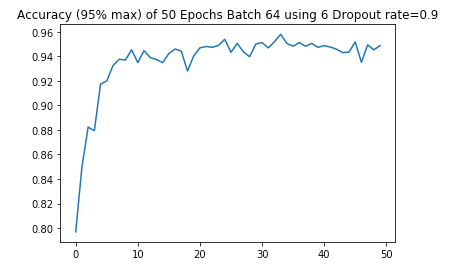

Accuracy 79% max of 30 Epochs, Batch 128, Learning Rate = 0.001 using 6 Dropout rate=0.5
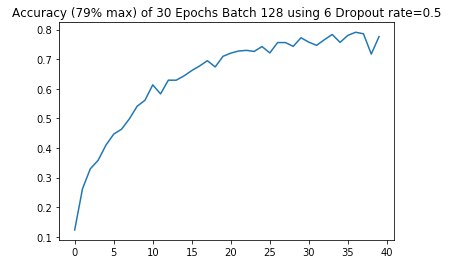

Accuracy 94% max of 30 Epochs, Batch 128, Learning Rate = 0.001 using 3 Dropout rate=0.9
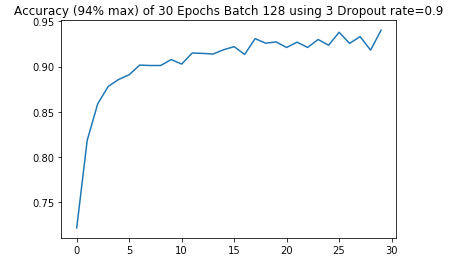

Accuracy of 50 Epochs, Batch 128, Learning Rate = 0.0005 using 1 Dropout rate=0.9
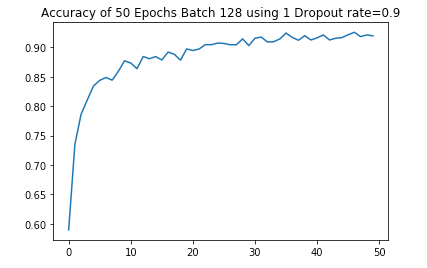

Accuracy of 50 Epochs, Batch 128, Learning Rate = 0.0005 using 2 Dropout rate=0.9
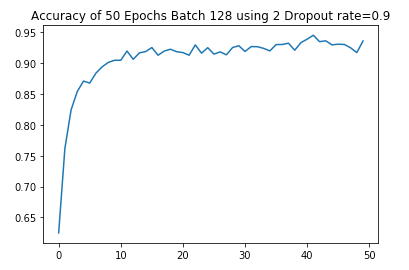

Accuracy of 10 Epochs, Batch 128, Learning Rate = 0.001 using Model 1
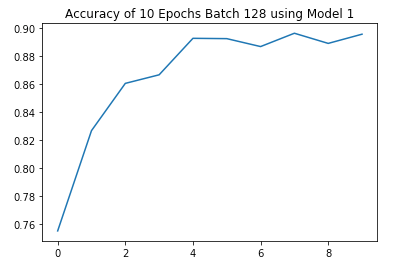

Accuracy of 40 Epochs, Batch 128, Learning Rate = 0.001 using Model 1
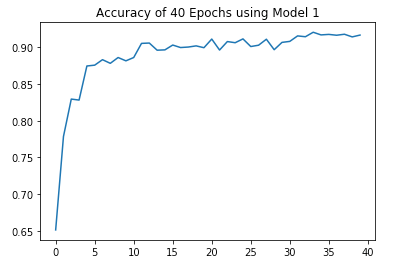

Accuracy of 60 Epochs, Batch 64, Learning Rate = 0.001 using Model 1
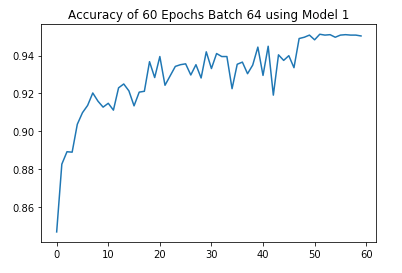

Accuracy of 50 Epochs, Batch 128, Learning Rate = 0.001 using Model 1
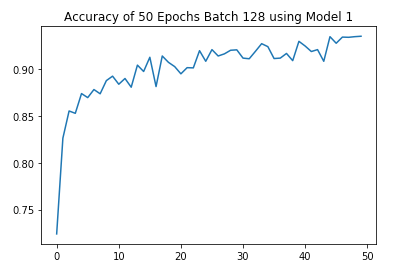

Accuracy of 50 Epochs, Batch 128, Learning Rate = 0.0005 using Model 1
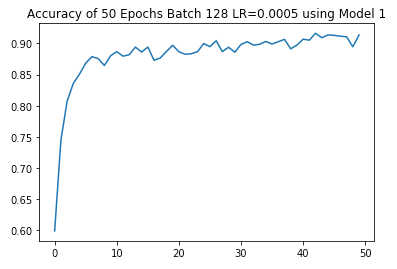

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

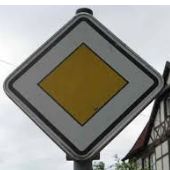
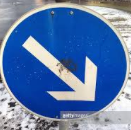
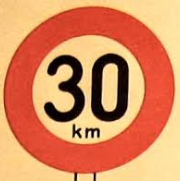
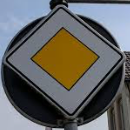
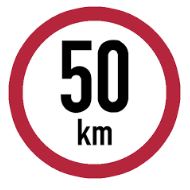
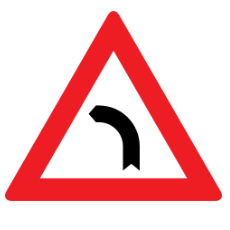
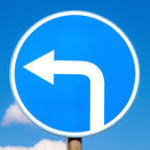
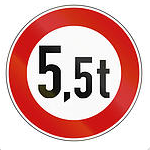

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

## Resources

Normalize RGB Pixels:
https://stackoverflow.com/questions/48785115/numpy-normalize-rgb-pixel-array

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81)

Yann LeCunn's Research Paper:  [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)